In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import keras
from zipfile import ZipFile
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler

In [4]:
# Open the pickle file
df = pickle.load(open('../data/processed/stock_data.pkl', 'rb'))
df

%Chg                                                  \
ticker                AAL  ALGT   ALK   DAL   ITA   IYT  JBLU  JETS   LUV   
Time                                                                        
2022-05-05 09:30:00 -1.38  2.10 -1.66 -1.19 -0.70 -0.96 -1.75 -0.97 -0.85   
2022-05-05 09:45:00 -0.67 -0.92 -0.21 -0.20 -0.29 -0.09 -0.09 -0.35 -0.15   
2022-05-05 10:00:00 -0.31 -0.25 -0.29 -0.15 -0.65 -0.36 -0.36 -0.26  0.04   
2022-05-05 10:15:00 -0.47 -0.36 -0.57 -0.60 -0.08 -0.42 -0.62 -0.56 -0.49   
2022-05-05 10:30:00  0.16 -0.29 -0.29 -0.16 -0.08 -0.14  0.00  0.00 -0.14   
...                   ...   ...   ...   ...   ...   ...   ...   ...   ...   
2025-05-30 14:45:00  0.22  0.13  0.09  0.02  0.10  0.12  0.39  0.09  0.12   
2025-05-30 15:00:00  0.09 -0.03 -0.09  0.21  0.11  0.02 -0.39  0.07  0.21   
2025-05-30 15:15:00  0.26  0.21  0.24  0.35  0.22  0.18  0.29  0.22  0.21   
2025-05-30 15:30:00 -0.13 -0.11 -0.31 -0.24 -0.11 -0.14 -0.49 -0.09 -0.15   
2025-05-30 15:45:00 -0.35 -0.73 -0.66 -0.32  0.01  0.00 -0.98  0.00 -0.40   

                           ...     Volume                                 \
ticker                UAL  ...        AAL      ALGT       ALK        DAL   
Time                       ...                                             
2022-05-05 09:30:00 -1.06  ...  3473869.0    5716.0   42947.0   708424.0   
2022-05-05 09:45:00 -0.64  ...  1107422.0    3718.0   22347.0   331864.0   
2022-05-05 10:00:00 -0.33  ...   881282.0    4430.0   45955.0   351036.0   
2022-05-05 10:15:00 -0.68  ...  1280844.0    3193.0   32508.0   420730.0   
2022-05-05 10:30:00  0.01  ...  1389956.0    1130.0   37288.0   394549.0   
...                   ...  ...        ...       ...       ...        ...   
2025-05-30 14:45:00  0.29  ...  1445222.0    6516.0   27711.0   261687.0   
2025-05-30 15:00:00  0.05  ...  1866339.0    5159.0   43059.0   206491.0   
2025-05-30 15:15:00  0.49  ...  1436577.0   11567.0   70278.0   394754.0   
2025-05-30 15:30:00 -0.19  ...  1747817.0   11718.0  131805.0   247533.0   
2025-05-30 15:45:00 -0.39  ...  7894033.0  110917.0  440444.0  1245698.0   

                                                                        \
ticker                   ITA      IYT       JBLU       JETS        LUV   
Time                                                                     
2022-05-05 09:30:00  26597.0  16652.0   541495.0  1037563.0   229638.0   
2022-05-05 09:45:00   9032.0   7200.0   227801.0   294311.0    72237.0   
2022-05-05 10:00:00   9982.0  23148.0   266955.0   233068.0   241276.0   
2022-05-05 10:15:00  10480.0  12800.0   279409.0   100068.0   154437.0   
2022-05-05 10:30:00  12918.0  24640.0   382768.0   170155.0    81960.0   
...                      ...      ...        ...        ...        ...   
2025-05-30 14:45:00   9343.0    738.0   791081.0    19757.0   171924.0   
2025-05-30 15:00:00   9035.0   3369.0   763213.0    30811.0   228804.0   
2025-05-30 15:15:00  12738.0   3297.0  1133607.0    64582.0   281941.0   
2025-05-30 15:30:00  40679.0  12343.0   985589.0    80263.0   480198.0   
2025-05-30 15:45:00  74404.0  22246.0  8400782.0  3476041.0  2026886.0   

                                
ticker                     UAL  
Time                            
2022-05-05 09:30:00   931819.0  
2022-05-05 09:45:00   484120.0  
2022-05-05 10:00:00   514940.0  
2022-05-05 10:15:00   490295.0  
2022-05-05 10:30:00   539214.0  
...                        ...  
2025-05-30 14:45:00   144655.0  
2025-05-30 15:00:00   169821.0  
2025-05-30 15:15:00   402686.0  
2025-05-30 15:30:00   232344.0  
2025-05-30 15:45:00  1984417.0  

[19954 rows x 530 columns]

In [ ]:
split_fraction = 0.8
train_split = int(split_fraction * int(df.shape[0]))
step = 6

past = 720
future = 72
learning_rate = 0.001
batch_size = 1000
epochs = 10

sc = StandardScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [18]:
print(
    "The selected parameters are:",
    ", ".join([titles[i] for i in [0, 1, 5, 7, 8, 10, 11]]),
)
selected_features = [feature_keys[i] for i in [0, 1, 5, 7, 8, 10, 11]]
features = df[selected_features]
features.index = df[date_time_key]
features.head()

features = normalize(features.values, train_split)
features = pd.DataFrame(features)

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

The selected parameters are: Pressure, Temperature, Saturation vapor pressure, Vapor pressure deficit, Specific humidity, Airtight, Wind speed


In [20]:
start = past + future
end = start + train_split

x_train = train_data[[i for i in range(7)]].values
y_train = features.iloc[start:end][[1]]

sequence_length = int(past / step)

In [21]:
sequence_length

120

In [22]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

In [23]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end][[i for i in range(7)]].values
y_val = features.iloc[label_start:][[1]]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (20560, 120, 7)
Target shape: (20560, 1)


In [24]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(10)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 120, 7)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10)             │           720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 731 (2.86 KB)

 Trainable params: 731 (2.86 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
path_checkpoint = "model_checkpoint.weights.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks=[es_callback, modelckpt_callback],
)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - loss: 1.0804
Epoch 1: val_loss improved from inf to 0.67705, saving model to model_checkpoint.weights.h5
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 555ms/step - loss: 1.0733 - val_loss: 0.6770
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step - loss: 0.8155
Epoch 2: val_loss improved from 0.67705 to 0.50353, saving model to model_checkpoint.weights.h5
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 590ms/step - loss: 0.8103 - val_loss: 0.5035
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - loss: 0.6182
Epoch 3: val_loss improved from 0.50353 to 0.39009, saving model to model_checkpoint.weights.h5
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 575ms/step - loss: 0.6144 - val_loss: 0.3901
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - loss: 0.4798
Epoch 4: val_loss improved from 0.39009 to 0.32792, saving model to model_checkpoint.weights.h5
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 600ms/step - loss: 0.4773 - val_loss: 0.3279
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step 

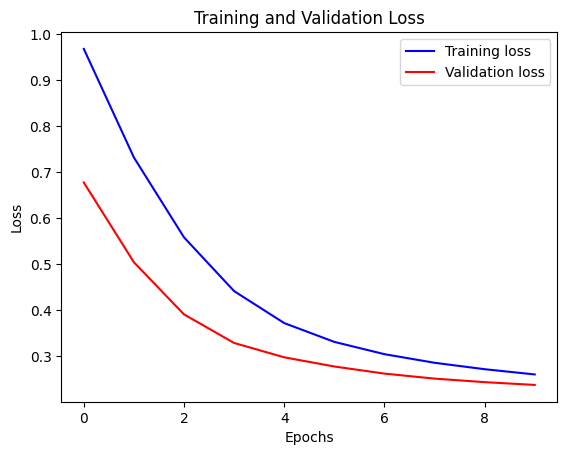

In [26]:
def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")